In [56]:
 
#Project 3 Starting Analysis
#
#Analyze age distribution
#
#What is the average, maximum and minimum balance in our data?
#
#Create a new column based on whether the bank balance of our customer is positive or negative? For the ones with a negative balance, how does the distribution across marital categories look like?
#
#Bank balance by education
#
#Top 10 people with most money- what kind of jobs they do?
#
#Split the data into our customer data:
#Most of our customers have what kind of profession?
#How many of our customers have defaulted before? Have most of our customers defaulted?
#For the ones that have defaulted, how many have a negative balance?
#
#For the different age groups in our data what age groups have positive balance vs negative balance
 

In [57]:
# use this for future lessons
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
#path ="C:/Users/mike/Desktop/Quickstart/Project_3/bank-full.csv"
Bank_Data = pd.read_csv("bank-full.csv")

In [58]:
# View imported data for review - to see what needs to be cleaned up
Bank_Data.columns
Bank_Data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [59]:
# First rrow is columns, need to make into numeric column header names 0-16
split_data = Bank_Data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";", expand= True, n=16 )
split_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [60]:
#  Renaming columns to assigning appropriate column name 
# implace set to true makes this a mutational . This created headers from dictionary
split_data.rename(columns={0:"age", 1:"job", 2:"marital", 3:"education", 4:"default", 5:"balance", 6:"housing", 7:"loan",8:"contact", 9:"day", 10:"month", 11:"duration", 12:"campaign", 13:"Pdays", 14:"Previous", 15:"POutcome", 16:"Y"}, inplace=True)


# Made Colunm headers caplitalize - this was extra 
split_data.columns = split_data.columns.str.title()


In [61]:
# Explore data types of the data
split_data.dtypes

Age          object
Job          object
Marital      object
Education    object
Default      object
Balance      object
Housing      object
Loan         object
Contact      object
Day          object
Month        object
Duration     object
Campaign     object
Pdays        object
Previous     object
Poutcome     object
Y            object
dtype: object

In [62]:
# Cleaning up ' " ' in the data
split_data["Job"]= split_data["Job"].str.replace('"',"")
split_data["Marital"]= split_data["Marital"].str.replace('"',"")
split_data["Education"]= split_data["Education"].str.replace('"',"")
split_data["Month"]= split_data["Month"].str.replace('"',"")
split_data["Default"]= split_data["Default"].str.replace('"',"")
split_data["Housing"]= split_data["Housing"].str.replace('"',"")
split_data["Loan"]= split_data["Loan"].str.replace('"',"")
split_data["Poutcome"]= split_data["Poutcome"].str.replace('"',"")
split_data["Contact"]= split_data["Contact"].str.replace('"',"")
split_data["Y"]= split_data["Y"].str.replace('"',"")
split_data.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [63]:
# Averge Age
y= split_data["Age"].astype("int").mean()
y

40.93621021432837

<Axes: >

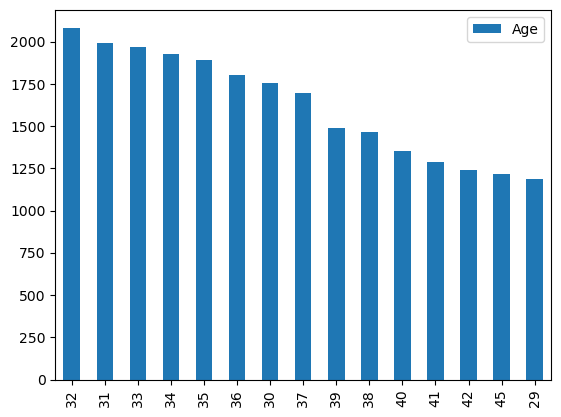

In [64]:
# Charting top 15 count of each age group
split_data["Age"].value_counts().sort_values(ascending = False).head(15).plot(kind="bar", legend = True)

In [65]:
# Exploring Average Balance
split_data["Balance"].astype("int").mean()

1362.2720576850766

In [66]:
# Exploring Max Balance
split_data["Balance"].astype("int").max()

102127

In [67]:
# Exploring Min Balance
split_data["Balance"].astype("int").min()

-8019

In [68]:
# Negative balance shows explains  high max balance  with a relatively low average balance

In [69]:
# Examine Balance
split_data["Balance"]

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: Balance, Length: 45211, dtype: object

In [70]:
# Create a function to Label each individual(row)  as neg,pos,0 balance
def balance_checker(amount):
    if amount<0:
        return "Negative balance individual"
    elif amount>0:
        return "Postive balance customer"
    else:
        return "Amount not found"


In [71]:
split_data["Balance_checker"]=split_data["Balance"].astype("int").apply(balance_checker)

In [72]:
split_data["Balance_checker"]

0        Postive balance customer
1        Postive balance customer
2        Postive balance customer
3        Postive balance customer
4        Postive balance customer
                   ...           
45206    Postive balance customer
45207    Postive balance customer
45208    Postive balance customer
45209    Postive balance customer
45210    Postive balance customer
Name: Balance_checker, Length: 45211, dtype: object

<Axes: >

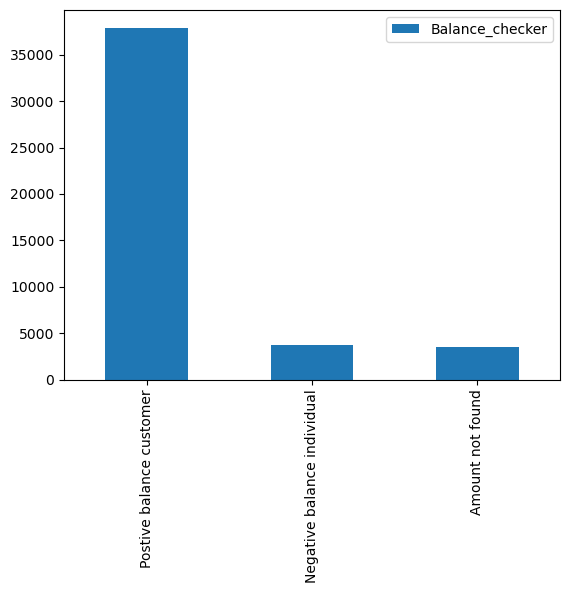

In [73]:
# Create a new column with labels created by balance_checker function
# Graph the results (count of each label) in bar chart
split_data["Balance_checker"].value_counts().plot(kind="bar",legend = True)


<Axes: xlabel='Marital'>

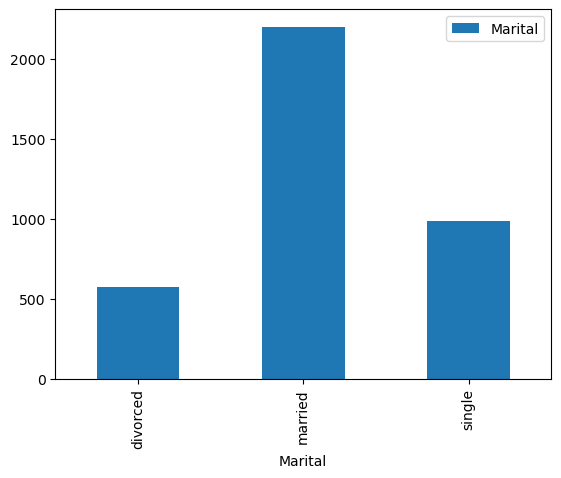

In [74]:
# Create group of dataframes broken up by Maritial Status
# Graph count of each maritial group
my_group = split_data[split_data["Balance_checker"]=="Negative balance individual"].groupby("Marital")
my_group.agg({"Marital":"count"}).plot(kind="bar", legend= True) # value counts would work the same way video 105 from udemy

In [75]:
split_data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,Balance_checker
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Postive balance customer
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Postive balance customer
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Postive balance customer
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Postive balance customer
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Postive balance customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Postive balance customer
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Postive balance customer
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Postive balance customer
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Postive balance customer


In [76]:
# Convert the values in Balance column to interger value to be used for computation
# Group Dataframes by Education level and examine Balance
split_data["Balance"] = split_data["Balance"].astype("int")
edu_group = split_data.groupby("Education").agg({"Balance":"mean"}).sort_values(by="Balance", ascending= False)

In [77]:
# Examine balance of each Education Level (group)
edu_group

,Balance
Education,
tertiary,1758.416435
unknown,1526.754443
primary,1250.949934
secondary,1154.880786


In [78]:
#Top 10 individuals with the most amount of balance
Top_10_in_data = split_data["Balance"].sort_values(ascending= False).head(n=10)
Top_10_in_data_all = split_data[split_data.index.isin(Top_10_in_data.index)]

In [79]:
# column Y is a  customer if Y
# do all above for known customers
# categorical - y/n  then use classification model
# linear regresssion is use numerical values in continuous - line of best fit - y = mx _+ b => classification is similiar to this regression model => using Logistic Regression


In [80]:
Top_10_in_data_all

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,Balance_checker
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,jul,339,2,-1,0,unknown,no,Postive balance customer
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no,Postive balance customer
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0,unknown,no,Postive balance customer
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no,Postive balance customer
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no,Postive balance customer
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no,Postive balance customer
41374,32,entrepreneur,single,tertiary,no,59649,no,no,cellular,1,sep,69,2,-1,0,unknown,no,Postive balance customer
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,Postive balance customer
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes,Postive balance customer
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes,Postive balance customer


In [81]:
# Examining jobs that fall into group top 10 balance
Top_10_in_data_all["Job"].value_counts()

management      3
retired         3
blue-collar     2
admin.          1
entrepreneur    1
Name: Job, dtype: int64

In [82]:
# Get a list of our customers
Customers = split_data[split_data["Y"]=='yes']

In [83]:
# Examine our customer's data 
Customers

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,Balance_checker
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Postive balance customer
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Postive balance customer
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Postive balance customer
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Postive balance customer
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Postive balance customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,Postive balance customer
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,Postive balance customer
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Postive balance customer
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Postive balance customer


<Axes: >

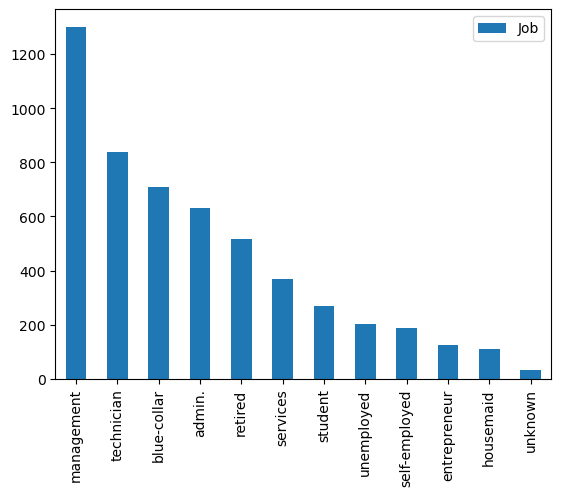

In [84]:
# Examining Jobs of our customers- seeing what job is held most by our current customers
Customers["Job"].value_counts().sort_values(ascending=False).plot(kind="bar", legend= True)

In [85]:
#Classification Code
split_data["Y"]


def into_numbers(column_name):
    if column_name=='yes':
        return 1
    elif column_name=='no':
        return 0
    else:
        return "column name not found"

split_data["Outcome_Variable"]= split_data['Y'].apply(into_numbers)

<Axes: >

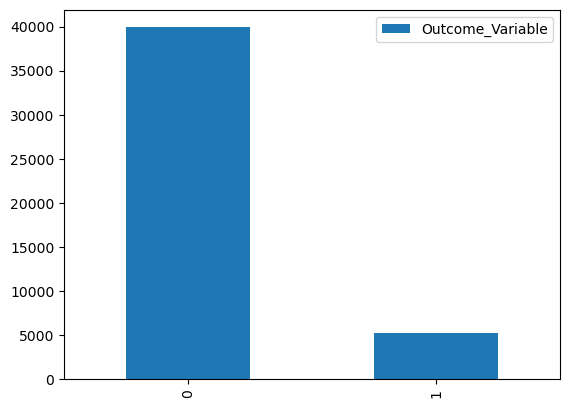

In [86]:
split_data["Outcome_Variable"].value_counts().plot(kind="bar", legend=True)

In [87]:
split_data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,Balance_checker,Outcome_Variable
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Postive balance customer,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Postive balance customer,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Postive balance customer,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Postive balance customer,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Postive balance customer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Postive balance customer,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Postive balance customer,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Postive balance customer,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Postive balance customer,0


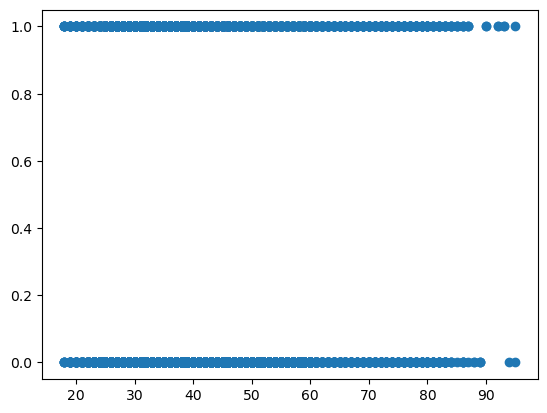

In [88]:
# Examine the scatter plot of ages
plt.scatter(x= split_data.Age.astype("float"), y=split_data.Outcome_Variable.astype("float"))

In [89]:
# Examine age 
split_data["Age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: Age, Length: 45211, dtype: object

In [90]:
# Examine age 
split_data.Age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: Age, Length: 45211, dtype: object

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(split_data[["Age", "Balance"]], split_data["Outcome_Variable"], test_size= 0.1)

In [93]:
X_train


,Age,Balance
12912,39,1
6120,55,150
11508,23,-782
30111,37,242
45203,23,113
...,...,...
9647,28,2788
21387,54,548
8684,56,207
8719,33,1165


In [94]:
Y_train

12912    0
6120     0
11508    0
30111    0
45203    1
        ..
9647     1
21387    1
8684     0
8719     0
6033     0
Name: Outcome_Variable, Length: 40689, dtype: int64

In [95]:
X_test

,Age,Balance
32059,40,1175
29655,28,525
7588,50,1093
31216,25,1116
34247,44,4236
...,...,...
2146,28,-214
40905,26,50
19023,56,276
41054,59,3368


In [96]:
Y_test

32059    1
29655    0
7588     0
31216    0
34247    0
        ..
2146     0
40905    0
19023    0
41054    0
26712    0
Name: Outcome_Variable, Length: 4522, dtype: int64

In [97]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, Y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
model.score(X_test, Y_test)


0.8845643520566121

In [99]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
model.predict_proba(X_test)

array([[0.88477018, 0.11522982],
       [0.89361674, 0.10638326],
       [0.87946492, 0.12053508],
       ...,
       [0.87932949, 0.12067051],
       [0.86432627, 0.13567373],
       [0.85163518, 0.14836482]])